In [1]:
import numpy as np
import gudhi
import mdtraj as md
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
from math import pi
import MDAnalysis as mda
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)
import pandas as pd
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import spectral_clustering
import random
import gudhi.representations

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
traj6 = md.load('normal100frame.pdb')
traj6 = md.Trajectory.superpose(traj6, traj6[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [3]:
carbon_atoms = traj6.topology.select("element == 'C'")

In [4]:
num_frames = traj6.n_frames

In [5]:
traj6.n_frames

100

In [6]:
intervals = []

for frame in range(traj6.n_frames):
    carbon_coordinates = traj6.xyz[frame, carbon_atoms, :]
    rips_complex = gudhi.RipsComplex(points = carbon_coordinates)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    persistence = simplex_tree.persistence()
    intervals.append(simplex_tree.persistence_intervals_in_dimension(1))

In [13]:
LS = gudhi.representations.Landscape(resolution=10000,sample_range = [0.3,0.6]
L = LS.fit_transform(intervals)
plt.plot(L[6][:10000])
plt.plot(L[6][10000:20000])
plt.plot(L[6][20000:30000])
plt.title("Landscape")
plt.show()

SyntaxError: '(' was never closed (902549446.py, line 1)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

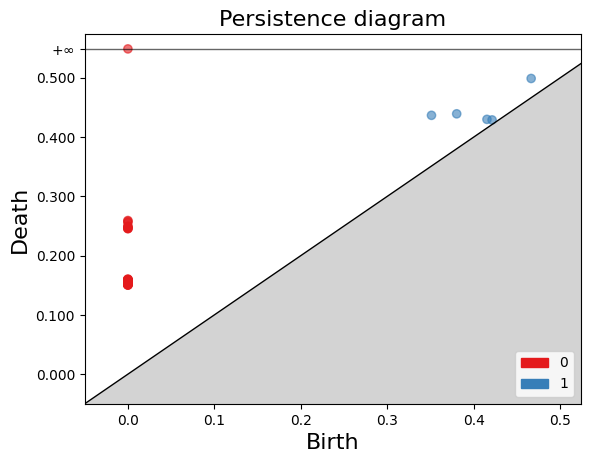

In [14]:
gudhi.plot_persistence_diagram(persistence)

In [15]:
# Transpose the list of lists to get lists of corresponding elements
transposed_lists = zip(*L)

# Calculate the average for each sublist of corresponding elements
averages = [sum(sublist) / len(sublist) for sublist in transposed_lists]

# The 'averages' list now contains the average for each corresponding element


In [16]:
print(len(averages))

50000


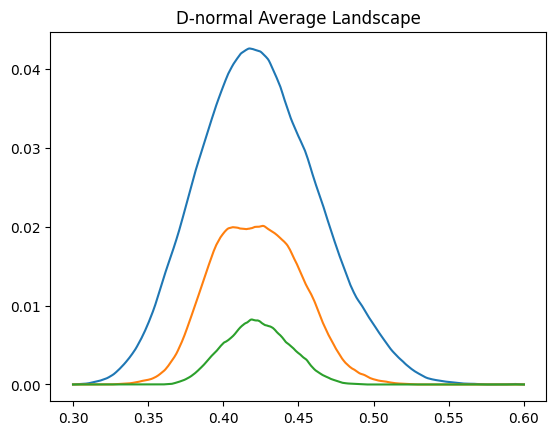

In [17]:
plt.plot(np.linspace(0.3,0.6,10000),averages[:10000])
plt.plot(np.linspace(0.3,0.6,10000),averages[10000:20000])
plt.plot(np.linspace(0.3,0.6,10000),averages[20000:30000])
plt.title("D-normal Average Landscape")
plt.savefig('normal Average Landscape', dpi=300)
plt.show()